<a href="https://colab.research.google.com/github/ounospanas/AIDL_A_02/blob/main/notebooks_solutions/AIDL_A02_network_optimization_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

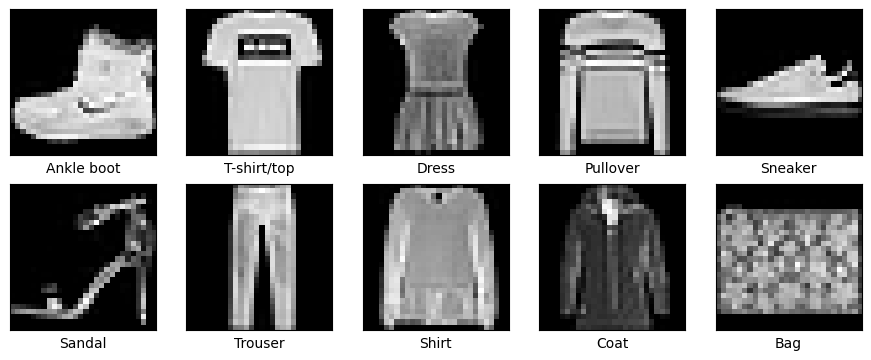

In [3]:
#visualize some data
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
selected = [0,1,3,5,6,8,16,18,19,23]
plt.figure(figsize=(11, 11))
for i, s in enumerate(selected):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #img = plt.imread(x_train[s])
    plt.imshow(x_train[s], cmap='gray')
    plt.xlabel(classes[y_train[s]],)

In [4]:
# normalize data
x_train = x_train.reshape(x_train.shape[0],-1)/255
x_test = x_test.reshape(x_test.shape[0],-1)/255

# Binary Classification

In [5]:
# select only t-shirts and ankle boots
shirt_train = np.where(y_train==0)
dress_train = np.where(y_train==3)

shirt_test = np.where(y_test==0)
dress_test = np.where(y_test==3)

In [6]:
# concatenate them
x_train_s = x_train[shirt_train]
y_train_s = y_train[shirt_train]

x_test_s = x_test[shirt_test]
y_test_s = y_test[shirt_test]

x_train_d = x_train[dress_train]
y_train_d = y_train[dress_train]

x_test_d = x_test[dress_test]
y_test_d = y_test[dress_test]

x_train_binary = np.concatenate([x_train_s, x_train_d])
x_test_binary = np.concatenate([x_test_s, x_test_d])

y_train_binary = np.concatenate([y_train_s, np.ones_like(y_train_d)])
y_test_binary = np.concatenate([y_test_s, np.ones_like(y_test_d)])

# Neural Network (Custom)

Compute the sigmoid function:
$$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$$

In [7]:
def sigmoid(z):
    """
    Compute sigmoid function.
    z : the product theta.T * x + b
    Returns
    -------
    g : The sigmoid function.
    """
    a = 1./(1+np.exp(-z))

    return a

$a = ReLU(z) = max(z,0)$

In [8]:
def relu(z):
    """
    Compute relu function.
    z : the product theta.T * x + b
    Returns
    -------
    a : The relu function.
    """
    a = np.maximum(z,0)

    return a

In [9]:
# check relu function
assert relu(-1) == 0
assert relu(2) == 2

# Parameter Initialization

Xavier initialization: $$[-\sqrt{\frac{6}{n_{in}+n_{out}}}, \sqrt{\frac{6}{n_{in}+n_{out}}}]$$

In [10]:
def init_params_xavier(n_in, n_out):
    # TO DO
    # set random seed to 0
    # Hint, check np.random.uniform
    np.random.seed(0)
    # init random params and multiply it with 0.1
    w = np.random.uniform(-np.sqrt(6./(n_in+n_out)), np.sqrt(6./(n_in+n_out)), (n_in, n_out))
    b = np.random.randn(n_out)*0.01
    return w, b

In [11]:
# check init params
w, b  = init_params_xavier(2,3)
print(np.round(w,4) == np.array([[ 0.1069,  0.4715,  0.2251],[ 0.0983, -0.1673,  0.3196]]))
print(np.round(b,4) == np.array([0.0095, -0.0015, -0.001]))

[[ True  True  True]
 [ True  True  True]]
[ True  True  True]


He initialization: $$np.random.randn(n_{in}, n_{out})*\sqrt{\frac{2}{n_{in}}}$$, not multiply using 0.01.

In [12]:
def init_params_he(n_in, n_out):
    # TO DO
    # set random seed to 0
    # Hint, check np.random.uniform
    np.random.seed(0)
    # init random params and multiply it with 0.1
    w = np.random.randn(n_in, n_out)*np.sqrt(2/n_in)
    b = np.random.randn(n_out)*np.sqrt(2/n_in)
    return w, b

In [13]:
# check init params
w, b  = init_params_he(2,3)
print(np.round(w,4) == np.array([[ 1.7641,  0.4002,  0.9787], [ 2.2409,  1.8676, -0.9773]]))
print(np.round(b,4) == np.array([0.9501, -0.1514, -0.1032]))

[[ True  True  True]
 [ True  True  True]]
[ True  True  True]


Calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

In [14]:
def costFunction(y, m, a):
    """
    Computes cost for linear regression.
    X : feature vector, shape (m x n+1)
    y : labels (i.e., dog or cat), shape (m, )
    w : parameters for the linear regression, shape (n+1, )
    m: data legth

    returns
    -------
    J : value of cost function.
    """

    J = -1/m * np.sum(y*np.log(a) + (1-y)*np.log(1-a))


    return J

In [15]:
#forward pass
def forward(X, w, b, activation = 'relu'):
    z = np.dot(X,w) + b
    if activation=='relu':
        a = relu(z)
    else:
        a = sigmoid(z)
    return a

In [16]:
w, b  = init_params_he(2,3)
forward(np.asarray([[1,2],[3,4]]), w, b, 'relu')[0].shape

(3,)

\begin{split}ReLU'(z)= \begin{Bmatrix}1 & z>0 \\
0 & z<0 \end{Bmatrix}\end{split}

In [17]:
#relu gradient
def reluBackward(z):
    z[z<=0] = 0
    z[z>0] = 1
    return z

Calculate the derivatives: $$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (A^{(i)}-Y^{(i)})$$

In [18]:
#backpropagation
def backward(a, dz):
    m = len(a)
    dw = np.dot(a.T, dz) / m
    db = np.sum(dz, axis=0, keepdims=True) / m

    return dw, db

$$ w_j := w_j - \alpha dw_j $$
$$ b := b - \alpha db $$

In [19]:
# update parameters for optimization
def update(w, b, dw, db, learning_rate=0.01):
    w = w - learning_rate*dw
    b = b - learning_rate*db
    return w, b

In [20]:
#forward pass
def dummy_neural(X, y, n_layer_1, lr = 0.01, epochs = 100):
    parameters = {}
    gradients = {}
    costs = []

    n_in = X.shape[1]
    n_out = 1

    # initialize network with 1 hidden layer (and 1 output of course).
    # Layer 1 should have 200 neurons
    w1, b1 = init_params_xavier(n_in, n_layer_1)
    w2, b2 = init_params_xavier(n_layer_1, n_out)

    parameters['w1'] = w1
    parameters['b1'] = b1
    parameters['w2'] = w2
    parameters['b2'] = b2

    for i in range(epochs):

        #forward pass
        a1 = forward(X, w1, b1, activation = 'relu')
        a2 = forward(a1, w2, b2, activation = 'sigmoid')

        #cost function
        cost = costFunction(y, len(y), a2)
        costs.append(cost)

        #backward pass
        dz2 = a2-y
        dw2, db2 = backward(a2, dz2)
        dz1 = np.dot((dz2),w2.T)*reluBackward(np.dot(X,w1) + b1)
        dw1, db1 = backward(X, dz1)

        gradients['dw1'] = dw1
        gradients['db1'] = db1
        gradients['dw2'] = dw2
        gradients['db2'] = db2

        #update weights
        w2, b2 = update(w2, b2, dw2, db2, lr)
        w1, b1 = update(w1, b1, dw1, db1, lr)

        parameters['w1'] = w1
        parameters['b1'] = b1
        parameters['w2'] = w2
        parameters['b2'] = b2

        if i%10==0:

            a1t = forward(x_test_binary, w1, b1, activation = 'relu')
            a2t = forward(a1t, w2, b2, activation = 'sigmoid')

            print("epoch {} with cost {}".format(i,cost))
            print("train:", np.mean(np.round(a2)==y))
            print("test:", np.mean(np.round(a2t.reshape(-1))==y_test_binary))

    return parameters, a2, costs, gradients

In [21]:
learning_rate = 0.1
a = dummy_neural(x_train_binary, y_train_binary.reshape(-1,1), 200, learning_rate, 1000)

epoch 0 with cost 0.73222077432145
train: 0.5068333333333334
test: 0.5
epoch 10 with cost 0.3449637483262826
train: 0.8908333333333334
test: 0.882
epoch 20 with cost 0.2831690845443682
train: 0.897
test: 0.894
epoch 30 with cost 0.25933951989654164
train: 0.9028333333333334
test: 0.9015
epoch 40 with cost 0.2452727337640431
train: 0.9095833333333333
test: 0.907
epoch 50 with cost 0.2353781215718836
train: 0.9139166666666667
test: 0.913
epoch 60 with cost 0.22785751996816328
train: 0.9176666666666666
test: 0.917
epoch 70 with cost 0.22213162272876213
train: 0.9193333333333333
test: 0.921
epoch 80 with cost 0.2175448627414139
train: 0.9216666666666666
test: 0.9225
epoch 90 with cost 0.2136466884836102
train: 0.9239166666666667
test: 0.9235
epoch 100 with cost 0.21042192808580465
train: 0.9250833333333334
test: 0.924
epoch 110 with cost 0.20771532431056403
train: 0.927
test: 0.9255
epoch 120 with cost 0.205382087686928
train: 0.928
test: 0.9275
epoch 130 with cost 0.20328904868104014
trai

In [22]:
# check the test accuracy
a1t = forward(x_test_binary, a[0]['w1'], a[0]['b1'], activation = 'relu')
a2t = forward(a1t, a[0]['w2'], a[0]['b2'], activation = 'sigmoid')
# if you used xavier
# assert np.mean(np.round(a2t.reshape(-1))==y_test_binary) == 0.9255
# if you used he
assert np.mean(np.round(a2t.reshape(-1))==y_test_binary) == 0.9405

# Learning rate scheduling

In [23]:
def lr_scheduling(lr, epoch, schedule = 'step_decay'):

  if schedule=='step_decay':
    #TO DO, every 50 epochs divide lr by 2
    if epoch%50==0:
      lr = lr/2
  elif schedule=='exponential_decay':
    #TO DO, multiply rl every epoch by exp(k), where k = 0.01
    k = 0.01
    lr = lr * np.exp(-k)
  else:
    print('No scheduler, please define a correct scheduler!')

  return lr

In [24]:
lr = 0.1
for i in range(200):
  lr = lr_scheduling(lr, i, schedule = 'step_decay')
assert lr==0.00625

lr = 0.1
for i in range(200):
  lr = lr_scheduling(lr, i, schedule = 'exponential_decay')
assert np.round(lr,4)==0.0135

# Dropout

In [25]:
a = np.ones((100, 20))

In [26]:
dr = np.random.rand(a.shape[0], a.shape[1]) < 0.8

In [27]:
a*dr

array([[1., 1., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 1., 1.]])

In [28]:
def dropout_forward(a, keep_prob):
    dr = np.random.rand(a.shape[0], a.shape[1])                   # Step 1: initialize matrix D1 = np.random.rand(..., ...)
    dr = (dr < keep_prob)                                         # Step 2: convert entries of D1 to 0 or 1 (using keep_prob as the threshold)
    a = a*dr                                                      # Step 3: shut down some neurons of A1
    a = a/keep_prob                                               # Step 4: the expected value of the activations becomes smaller because some
                                                                  # neurons are zeroed out.To compensate for this drop and keep the overall scale
                                                                  # of activations the same, you divide by keep_prob.
    return a, dr

In [29]:
def dropout_backward(da, dr, keep_prob):
    da = da*dr              # Step 1: Apply mask D2 to shut down the same neurons as during the forward propagation
    da = da/keep_prob       # Step 2: Scale the value of neurons that haven't been shut down
    return da

In [30]:
#forward pass
def dummy_neural_dr(X, y, n_layer_1, lr = 0.01, epochs = 100, keep_prob=1.0):
    parameters = {}
    gradients = {}
    costs = []

    n_in = X.shape[1]
    n_out = 1

    # initialize network with 1 hidden layer (and 1 output of course).
    # Layer 1 should have 200 neurons
    w1, b1 = init_params_xavier(n_in, n_layer_1)
    w2, b2 = init_params_xavier(n_layer_1, n_out)

    parameters['w1'] = w1
    parameters['b1'] = b1
    parameters['w2'] = w2
    parameters['b2'] = b2

    for i in range(epochs):

        #forward pass
        a1 = forward(X, w1, b1, activation = 'relu')
        a1, dr = dropout_forward(a1, keep_prob)
        a2 = forward(a1, w2, b2, activation = 'sigmoid')

        #cost function
        cost = costFunction(y, len(y), a2)
        costs.append(cost)

        #backward pass
        dz2 = a2-y
        dw2, db2 = backward(a2, dz2)
        da1 = np.dot((dz2),w2.T)
        da1 = dropout_backward(da1,dr,keep_prob)
        dz1 = da1*reluBackward(np.dot(X,w1) + b1)
        dw1, db1 = backward(X, dz1)

        gradients['dw1'] = dw1
        gradients['db1'] = db1
        gradients['dw2'] = dw2
        gradients['db2'] = db2

        #update weights
        w2, b2 = update(w2, b2, dw2, db2, lr)
        w1, b1 = update(w1, b1, dw1, db1, lr)

        parameters['w1'] = w1
        parameters['b1'] = b1
        parameters['w2'] = w2
        parameters['b2'] = b2

        if i%10==0:

            a1t = forward(x_test_binary, w1, b1, activation = 'relu')
            a2t = forward(a1t, w2, b2, activation = 'sigmoid')

            print("epoch {} with cost {}".format(i,cost))
            print("train:", np.mean(np.round(a2)==y))
            print("test:", np.mean(np.round(a2t.reshape(-1))==y_test_binary))

    return parameters, a2, costs, gradients

In [31]:
learning_rate = 0.1
a = dummy_neural_dr(x_train_binary, y_train_binary.reshape(-1,1), 200, learning_rate, 1000, 0.8)

epoch 0 with cost 0.7400915087985281
train: 0.5015
test: 0.5
epoch 10 with cost 0.3479958667942149
train: 0.88675
test: 0.883
epoch 20 with cost 0.28823039171222914
train: 0.8973333333333333
test: 0.8935
epoch 30 with cost 0.26628643339401936
train: 0.9026666666666666
test: 0.9035
epoch 40 with cost 0.25055773375838103
train: 0.9058333333333334
test: 0.9065
epoch 50 with cost 0.24166767823940236
train: 0.9090833333333334
test: 0.913
epoch 60 with cost 0.23348936992067992
train: 0.9135
test: 0.9165
epoch 70 with cost 0.22803327412241614
train: 0.9165
test: 0.92
epoch 80 with cost 0.2225962181028209
train: 0.9174166666666667
test: 0.9225
epoch 90 with cost 0.21845386209811007
train: 0.92
test: 0.923
epoch 100 with cost 0.21576787803067743
train: 0.9215833333333333
test: 0.9245
epoch 110 with cost 0.21476061539802085
train: 0.9211666666666667
test: 0.9255
epoch 120 with cost 0.2098592280641482
train: 0.9239166666666667
test: 0.9265
epoch 130 with cost 0.2079316302105814
train: 0.926916666

In [32]:
# check the test accuracy
a1t = forward(x_test_binary, a[0]['w1'], a[0]['b1'], activation = 'relu')
a2t = forward(a1t, a[0]['w2'], a[0]['b2'], activation = 'sigmoid')
# if you used xavier
np.mean(np.round(a2t.reshape(-1))==y_test_binary)

np.float64(0.9405)

# Neural Network Binary (Keras)

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
seed = 2
tf.random.set_seed(seed)
np.random.seed(seed)

model = Sequential()
model.add(Dense(200, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

batch_size = 128
epochs = 200


model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
history_1 = model.fit(x_train_binary, y_train_binary, batch_size=batch_size, epochs=epochs,
          validation_data=(x_test_binary, y_test_binary))

Epoch 1/200
94/94 [==============================] - 3s 6ms/step - loss: 0.4599 - accuracy: 0.8262 - val_loss: 0.3280 - val_accuracy: 0.8900
Epoch 2/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2818 - accuracy: 0.9045 - val_loss: 0.2685 - val_accuracy: 0.8975
Epoch 3/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2425 - accuracy: 0.9092 - val_loss: 0.2431 - val_accuracy: 0.9050
Epoch 4/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2229 - accuracy: 0.9136 - val_loss: 0.2280 - val_accuracy: 0.9070
Epoch 5/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2102 - accuracy: 0.9185 - val_loss: 0.2165 - val_accuracy: 0.9155
Epoch 6/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2009 - accuracy: 0.9215 - val_loss: 0.2105 - val_accuracy: 0.9175
Epoch 7/200
94/94 [==============================] - 0s 4ms/step - loss: 0.1942 - accuracy: 0.9230 - val_loss: 0.2029 - val_accuracy: 0.9215
Epoch 8/200
9

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
seed = 2
tf.random.set_seed(seed)
np.random.seed(seed)

model = Sequential()
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))

batch_size = 128
epochs = 200


model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
history_2 = model.fit(x_train_binary, y_train_binary, batch_size=batch_size, epochs=epochs,
          validation_data=(x_test_binary, y_test_binary))

Epoch 1/200
94/94 [==============================] - 2s 6ms/step - loss: 0.4479 - accuracy: 0.8279 - val_loss: 0.3333 - val_accuracy: 0.8825
Epoch 2/200
94/94 [==============================] - 0s 5ms/step - loss: 0.2967 - accuracy: 0.8942 - val_loss: 0.2761 - val_accuracy: 0.8925
Epoch 3/200
94/94 [==============================] - 1s 5ms/step - loss: 0.2561 - accuracy: 0.9018 - val_loss: 0.2506 - val_accuracy: 0.9030
Epoch 4/200
94/94 [==============================] - 1s 6ms/step - loss: 0.2367 - accuracy: 0.9086 - val_loss: 0.2351 - val_accuracy: 0.9030
Epoch 5/200
94/94 [==============================] - 1s 6ms/step - loss: 0.2251 - accuracy: 0.9105 - val_loss: 0.2241 - val_accuracy: 0.9120
Epoch 6/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2146 - accuracy: 0.9163 - val_loss: 0.2186 - val_accuracy: 0.9120
Epoch 7/200
94/94 [==============================] - 0s 4ms/step - loss: 0.2078 - accuracy: 0.9168 - val_loss: 0.2103 - val_accuracy: 0.9205
Epoch 8/200
9

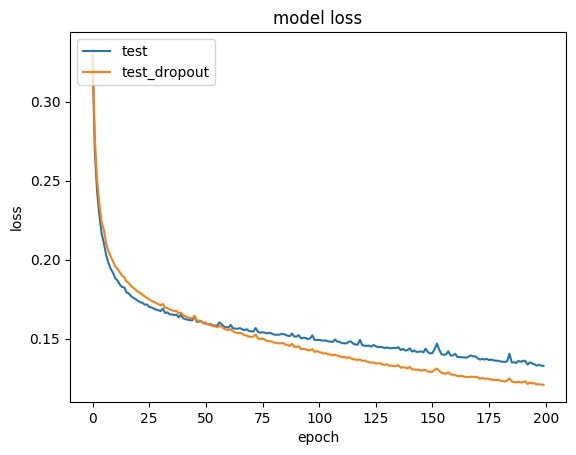

In [ ]:
# summarize history for loss
plt.plot(history_1.history['val_loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'test_dropout'], loc='upper left')
plt.show()

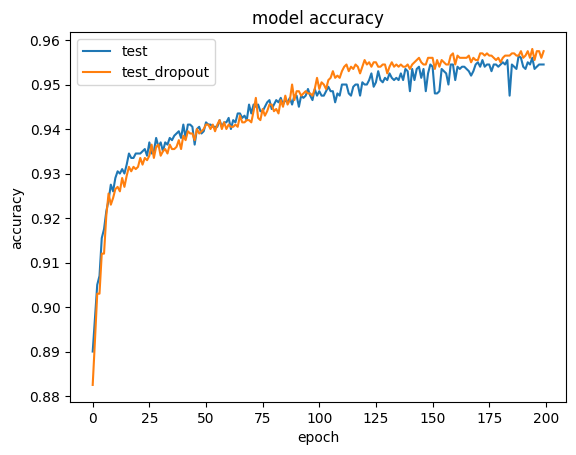

In [ ]:
# summarize history for loss
plt.plot(history_1.history['val_accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'test_dropout'], loc='upper left')
plt.show()

# Validation Set (The CORRECT way of training and evaluation process)

In [37]:
#cross validation example
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint #save the model version that achieved lower loss!

kfold = KFold(n_splits=5, shuffle=True, random_state=2) # number of folds, shuffle, seed

In [38]:
kfold

KFold(n_splits=5, random_state=2, shuffle=True)

In [39]:
# enumerate splits
fold = 1
for train, val in kfold.split(x_train_binary):
  print('train: %s, val: %s' % (train, val))
  X_train_binary = x_train_binary[train]
  Y_train_binary = y_train_binary[train]
  X_val_binary = x_train_binary[val]
  Y_val_binary = y_train_binary[val]

  seed = 2
  tf.random.set_seed(seed)
  np.random.seed(seed)

  model = Sequential()
  model.add(Dense(200, activation="relu"))
  model.add(Dropout(0.25))
  model.add(Dense(1, activation="sigmoid"))

  batch_size = 128
  epochs = 20

  save_model = ModelCheckpoint('best_model_'+str(fold)+'.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=2)

  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
  history_3 = model.fit(X_train_binary, Y_train_binary, batch_size=batch_size, epochs=epochs, callbacks=[save_model],
            validation_data=(X_val_binary, Y_val_binary))
  fold+=1

train: [    0     1     3 ... 11997 11998 11999], val: [    2     4    10 ... 11991 11992 11994]
Epoch 1/20
63/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8663 - loss: 0.3082
Epoch 1: val_loss improved from inf to 0.15679, saving model to best_model_1.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8737 - loss: 0.2948 - val_accuracy: 0.9408 - val_loss: 0.1568
Epoch 2/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9273 - loss: 0.1747
Epoch 2: val_loss improved from 0.15679 to 0.14304, saving model to best_model_1.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9274 - loss: 0.1746 - val_accuracy: 0.9463 - val_loss: 0.1430
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.1552
Epoch 3: val_loss improved from 0.14304 to 0.13417, saving model to best_model_1.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.1552 - val_accuracy: 0.9504 - val_loss: 0.1342
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9445 - loss: 0.1412
Epoch 4: val_loss improved from 0.13417 to 0.13183, saving model to best_model_1.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9445 - loss: 0.1412 - val_accuracy: 0.9471 - val_loss: 0.1318
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9463 - loss: 0.1327
Epoch 5: val_loss improved from 0.13183 to 0.11902, saving model to best_model_1.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9464 - loss: 0.1327 - val_accuracy: 0.9583 - val_loss: 0.1190
Epoch 6/20
51/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9497 - loss: 0.1229
Epoch 6: val_loss improved from 0.11902 to 0.11580, saving model to best_model_1.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9519 - loss: 0.1211 - val_accuracy: 0.9579 - val_loss: 0.1158
Epoch 7/20
69/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9576 - loss: 0.1145
Epoch 7: val_loss improved from 0.11580 to 0.10694, saving model to best_model_1.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9578 - loss: 0.1143 - val_accuracy: 0.9638 - val_loss: 0.1069
Epoch 8/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9604 - loss: 0.1061
Epoch 8: val_loss did not improve from 0.10694
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9604 - loss: 0.1060 - val_accuracy: 0.9600 - val_loss: 0.1070
Epoch 9/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9636 - loss: 0.0987
Epoch 9: val_loss improved from 0.10694 to 0.09991, saving model to best_model_1.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9636 - loss: 0.0987 - val_accuracy: 0.9650 - val_loss: 0.0999
Epoch 10/20
51/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9628 - loss: 0.0968
Epoch 10: val_loss improved from 0.09991 to 0.09853, saving model to best_model_1.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9638 - loss: 0.0960 - val_accuracy: 0.9654 - val_loss: 0.0985
Epoch 11/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9655 - loss: 0.0911
Epoch 11: val_loss improved from 0.09853 to 0.09514, saving model to best_model_1.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9655 - loss: 0.0911 - val_accuracy: 0.9679 - val_loss: 0.0951
Epoch 12/20
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9706 - loss: 0.0852
Epoch 12: val_loss did not improve from 0.09514
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9705 - loss: 0.0852 - val_accuracy: 0.9688 - val_loss: 0.0961
Epoch 13/20
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9693 - loss: 0.0824
Epoch 13: val_loss improved from 0.09514 to 0.09423, saving model to best_model_1.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9693 - loss: 0.0825 - val_accuracy: 0.9700 - val_loss: 0.0942
Epoch 14/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9722 - loss: 0.0772
Epoch 14: val_loss did not improve from 0.09423
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9721 - loss: 0.0773 - val_accuracy: 0.9692 - val_loss: 0.0960
Epoch 15/20
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9717 - loss: 0.0735
Epoch 15: val_loss did not improve from 0.09423
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9718 - loss: 0.0735 - val_accuracy: 0.9683 - val_loss: 0.0993
Epoch 16/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9732 - loss: 0.0733
Epoch 16: val_loss did not improve from 0.09423
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9732 - loss: 0.0733 - val_accuracy: 0.9642 - val_loss: 0.1046
Epoch 17/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9751 - loss: 0.0688
Epoch 17: val_loss improved from 0.09423 to 0.09353, sav

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9751 - loss: 0.0688 - val_accuracy: 0.9675 - val_loss: 0.0935
Epoch 18/20
69/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9790 - loss: 0.0636
Epoch 18: val_loss did not improve from 0.09353
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9788 - loss: 0.0639 - val_accuracy: 0.9679 - val_loss: 0.0955
Epoch 19/20
51/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9776 - loss: 0.0663
Epoch 19: val_loss improved from 0.09353 to 0.09348, saving model to best_model_1.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9786 - loss: 0.0647 - val_accuracy: 0.9663 - val_loss: 0.0935
Epoch 20/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9784 - loss: 0.0606
Epoch 20: val_loss improved from 0.09348 to 0.08893, saving model to best_model_1.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9784 - loss: 0.0606 - val_accuracy: 0.9700 - val_loss: 0.0889
train: [    0     1     2 ... 11997 11998 11999], val: [    3     5     6 ... 11988 11989 11993]
Epoch 1/20
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8584 - loss: 0.3094
Epoch 1: val_loss improved from inf to 0.18786, saving model to best_model_2.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8602 - loss: 0.3063 - val_accuracy: 0.9271 - val_loss: 0.1879
Epoch 2/20
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9344 - loss: 0.1615
Epoch 2: val_loss improved from 0.18786 to 0.17664, saving model to best_model_2.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9345 - loss: 0.1617 - val_accuracy: 0.9321 - val_loss: 0.1766
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9468 - loss: 0.1419
Epoch 3: val_loss improved from 0.17664 to 0.16771, saving model to best_model_2.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9468 - loss: 0.1420 - val_accuracy: 0.9375 - val_loss: 0.1677
Epoch 4/20
68/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9479 - loss: 0.1311
Epoch 4: val_loss improved from 0.16771 to 0.16051, saving model to best_model_2.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9478 - loss: 0.1319 - val_accuracy: 0.9392 - val_loss: 0.1605
Epoch 5/20
51/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9561 - loss: 0.1179
Epoch 5: val_loss improved from 0.16051 to 0.15348, saving model to best_model_2.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9548 - loss: 0.1211 - val_accuracy: 0.9408 - val_loss: 0.1535
Epoch 6/20
65/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9576 - loss: 0.1134
Epoch 6: val_loss improved from 0.15348 to 0.14152, saving model to best_model_2.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9574 - loss: 0.1143 - val_accuracy: 0.9458 - val_loss: 0.1415
Epoch 7/20
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9642 - loss: 0.1034
Epoch 7: val_loss improved from 0.14152 to 0.13635, saving model to best_model_2.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9640 - loss: 0.1038 - val_accuracy: 0.9500 - val_loss: 0.1363
Epoch 8/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9610 - loss: 0.1020
Epoch 8: val_loss improved from 0.13635 to 0.12868, saving model to best_model_2.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9610 - loss: 0.1022 - val_accuracy: 0.9538 - val_loss: 0.1287
Epoch 9/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9654 - loss: 0.0930
Epoch 9: val_loss improved from 0.12868 to 0.11680, saving model to best_model_2.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9653 - loss: 0.0934 - val_accuracy: 0.9600 - val_loss: 0.1168
Epoch 10/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9693 - loss: 0.0859
Epoch 10: val_loss improved from 0.11680 to 0.11435, saving model to best_model_2.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9692 - loss: 0.0861 - val_accuracy: 0.9588 - val_loss: 0.1143
Epoch 11/20
67/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9700 - loss: 0.0829
Epoch 11: val_loss improved from 0.11435 to 0.11207, saving model to best_model_2.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9699 - loss: 0.0836 - val_accuracy: 0.9608 - val_loss: 0.1121
Epoch 12/20
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9729 - loss: 0.0771
Epoch 12: val_loss improved from 0.11207 to 0.10756, saving model to best_model_2.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9729 - loss: 0.0773 - val_accuracy: 0.9613 - val_loss: 0.1076
Epoch 13/20
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9726 - loss: 0.0764
Epoch 13: val_loss did not improve from 0.10756
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9725 - loss: 0.0767 - val_accuracy: 0.9629 - val_loss: 0.1076
Epoch 14/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9737 - loss: 0.0716
Epoch 14: val_loss improved from 0.10756 to 0.10404, saving model to best_model_2.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9736 - loss: 0.0718 - val_accuracy: 0.9625 - val_loss: 0.1040
Epoch 15/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9766 - loss: 0.0678
Epoch 15: val_loss did not improve from 0.10404
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9766 - loss: 0.0679 - val_accuracy: 0.9625 - val_loss: 0.1082
Epoch 16/20
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9767 - loss: 0.0664
Epoch 16: val_loss did not improve from 0.10404
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9766 - loss: 0.0666 - val_accuracy: 0.9629 - val_loss: 0.1049
Epoch 17/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9776 - loss: 0.0622
Epoch 17: val_loss improved from 0.10404 to 0.10253, saving model to best_model_2.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9776 - loss: 0.0623 - val_accuracy: 0.9621 - val_loss: 0.1025
Epoch 18/20
67/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9783 - loss: 0.0606
Epoch 18: val_loss did not improve from 0.10253
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9783 - loss: 0.0609 - val_accuracy: 0.9629 - val_loss: 0.1042
Epoch 19/20
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9781 - loss: 0.0600
Epoch 19: val_loss did not improve from 0.10253
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9780 - loss: 0.0601 - val_accuracy: 0.9650 - val_loss: 0.1029
Epoch 20/20
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9812 - loss: 0.0551
Epoch 20: val_loss did not improve from 0.10253
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9812 - loss: 0.0553 - val_accuracy: 0.9650 - val_loss: 0.1054
train: [    1     2     3 ... 11994 11995 11996], val: [    0    13    19 ... 11997 11998 11999]
Epoch 1/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8636 - loss: 0.2987 - val_accuracy: 0.9388 - val_loss: 0.1731
Epoch 2/20
65/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9332 - loss: 0.1693
Epoch 2: val_loss improved from 0.17311 to 0.15221, saving model to best_model_3.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9337 - loss: 0.1680 - val_accuracy: 0.9429 - val_loss: 0.1522
Epoch 3/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9441 - loss: 0.1475
Epoch 3: val_loss improved from 0.15221 to 0.14325, saving model to best_model_3.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9441 - loss: 0.1474 - val_accuracy: 0.9471 - val_loss: 0.1432
Epoch 4/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9510 - loss: 0.1311
Epoch 4: val_loss improved from 0.14325 to 0.14117, saving model to best_model_3.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9509 - loss: 0.1310 - val_accuracy: 0.9467 - val_loss: 0.1412
Epoch 5/20
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9569 - loss: 0.1248
Epoch 5: val_loss improved from 0.14117 to 0.12795, saving model to best_model_3.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9568 - loss: 0.1246 - val_accuracy: 0.9521 - val_loss: 0.1280
Epoch 6/20
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9622 - loss: 0.1119
Epoch 6: val_loss improved from 0.12795 to 0.12607, saving model to best_model_3.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9621 - loss: 0.1119 - val_accuracy: 0.9525 - val_loss: 0.1261
Epoch 7/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9642 - loss: 0.1072
Epoch 7: val_loss improved from 0.12607 to 0.11770, saving model to best_model_3.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9642 - loss: 0.1072 - val_accuracy: 0.9533 - val_loss: 0.1177
Epoch 8/20
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9684 - loss: 0.0975
Epoch 8: val_loss did not improve from 0.11770
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9683 - loss: 0.0976 - val_accuracy: 0.9554 - val_loss: 0.1183
Epoch 9/20
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9699 - loss: 0.0916
Epoch 9: val_loss improved from 0.11770 to 0.11649, saving model to best_model_3.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9698 - loss: 0.0916 - val_accuracy: 0.9542 - val_loss: 0.1165
Epoch 10/20
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.0886
Epoch 10: val_loss improved from 0.11649 to 0.11232, saving model to best_model_3.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9688 - loss: 0.0886 - val_accuracy: 0.9583 - val_loss: 0.1123
Epoch 11/20
67/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9731 - loss: 0.0825
Epoch 11: val_loss improved from 0.11232 to 0.11177, saving model to best_model_3.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9728 - loss: 0.0829 - val_accuracy: 0.9563 - val_loss: 0.1118
Epoch 12/20
70/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9735 - loss: 0.0798
Epoch 12: val_loss improved from 0.11177 to 0.10913, saving model to best_model_3.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9733 - loss: 0.0801 - val_accuracy: 0.9583 - val_loss: 0.1091
Epoch 13/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9727 - loss: 0.0811
Epoch 13: val_loss did not improve from 0.10913
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9727 - loss: 0.0810 - val_accuracy: 0.9533 - val_loss: 0.1152
Epoch 14/20
70/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9741 - loss: 0.0790
Epoch 14: val_loss improved from 0.10913 to 0.10513, saving model to best_model_3.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9741 - loss: 0.0788 - val_accuracy: 0.9629 - val_loss: 0.1051
Epoch 15/20
65/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9737 - loss: 0.0743
Epoch 15: val_loss improved from 0.10513 to 0.10172, saving model to best_model_3.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9737 - loss: 0.0742 - val_accuracy: 0.9625 - val_loss: 0.1017
Epoch 16/20
62/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9791 - loss: 0.0691
Epoch 16: val_loss improved from 0.10172 to 0.09969, saving model to best_model_3.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9787 - loss: 0.0693 - val_accuracy: 0.9638 - val_loss: 0.0997
Epoch 17/20
63/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9782 - loss: 0.0679
Epoch 17: val_loss did not improve from 0.09969
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9782 - loss: 0.0677 - val_accuracy: 0.9642 - val_loss: 0.1004
Epoch 18/20
68/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9774 - loss: 0.0674
Epoch 18: val_loss did not improve from 0.09969
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9774 - loss: 0.0674 - val_accuracy: 0.9638 - val_loss: 0.1013
Epoch 19/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9803 - loss: 0.0631
Epoch 19: val_loss improved from 0.09969 to 0.09898, saving model to best_model_3.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9803 - loss: 0.0631 - val_accuracy: 0.9646 - val_loss: 0.0990
Epoch 20/20
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9804 - loss: 0.0602
Epoch 20: val_loss did not improve from 0.09898
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9803 - loss: 0.0602 - val_accuracy: 0.9613 - val_loss: 0.1002
train: [    0     1     2 ... 11997 11998 11999], val: [    7     9    21 ... 11948 11952 11955]
Epoch 1/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8429 - loss: 0.3315
Epoch 1: val_loss improved from inf to 0.20097, saving model to best_model_4.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8464 - loss: 0.3256 - val_accuracy: 0.9258 - val_loss: 0.2010
Epoch 2/20
65/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9355 - loss: 0.1722
Epoch 2: val_loss improved from 0.20097 to 0.18465, saving model to best_model_4.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9354 - loss: 0.1717 - val_accuracy: 0.9308 - val_loss: 0.1847
Epoch 3/20
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9449 - loss: 0.1498
Epoch 3: val_loss improved from 0.18465 to 0.17033, saving model to best_model_4.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9448 - loss: 0.1498 - val_accuracy: 0.9358 - val_loss: 0.1703
Epoch 4/20
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9536 - loss: 0.1392
Epoch 4: val_loss improved from 0.17033 to 0.15329, saving model to best_model_4.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9534 - loss: 0.1392 - val_accuracy: 0.9446 - val_loss: 0.1533
Epoch 5/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9542 - loss: 0.1291
Epoch 5: val_loss improved from 0.15329 to 0.12840, saving model to best_model_4.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9542 - loss: 0.1290 - val_accuracy: 0.9550 - val_loss: 0.1284
Epoch 6/20
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9596 - loss: 0.1197
Epoch 6: val_loss improved from 0.12840 to 0.11764, saving model to best_model_4.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9595 - loss: 0.1197 - val_accuracy: 0.9579 - val_loss: 0.1176
Epoch 7/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9619 - loss: 0.1121
Epoch 7: val_loss improved from 0.11764 to 0.11085, saving model to best_model_4.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9618 - loss: 0.1122 - val_accuracy: 0.9617 - val_loss: 0.1109
Epoch 8/20
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9634 - loss: 0.1070
Epoch 8: val_loss improved from 0.11085 to 0.10643, saving model to best_model_4.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9634 - loss: 0.1070 - val_accuracy: 0.9617 - val_loss: 0.1064
Epoch 9/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9660 - loss: 0.1002
Epoch 9: val_loss improved from 0.10643 to 0.10459, saving model to best_model_4.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9660 - loss: 0.1002 - val_accuracy: 0.9613 - val_loss: 0.1046
Epoch 10/20
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9681 - loss: 0.0937
Epoch 10: val_loss improved from 0.10459 to 0.09989, saving model to best_model_4.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9681 - loss: 0.0937 - val_accuracy: 0.9642 - val_loss: 0.0999
Epoch 11/20
67/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9686 - loss: 0.0915
Epoch 11: val_loss did not improve from 0.09989
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9686 - loss: 0.0913 - val_accuracy: 0.9617 - val_loss: 0.1010
Epoch 12/20
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9693 - loss: 0.0875
Epoch 12: val_loss improved from 0.09989 to 0.09790, saving model to best_model_4.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9694 - loss: 0.0874 - val_accuracy: 0.9621 - val_loss: 0.0979
Epoch 13/20
70/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9708 - loss: 0.0839
Epoch 13: val_loss did not improve from 0.09790
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9708 - loss: 0.0838 - val_accuracy: 0.9638 - val_loss: 0.0990
Epoch 14/20
70/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9735 - loss: 0.0817
Epoch 14: val_loss did not improve from 0.09790
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9736 - loss: 0.0814 - val_accuracy: 0.9650 - val_loss: 0.0984
Epoch 15/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9709 - loss: 0.0827
Epoch 15: val_loss improved from 0.09790 to 0.09624, saving model to best_model_4.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9709 - loss: 0.0825 - val_accuracy: 0.9642 - val_loss: 0.0962
Epoch 16/20
69/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9745 - loss: 0.0768
Epoch 16: val_loss improved from 0.09624 to 0.09473, saving model to best_model_4.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9746 - loss: 0.0765 - val_accuracy: 0.9629 - val_loss: 0.0947
Epoch 17/20
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9764 - loss: 0.0728
Epoch 17: val_loss improved from 0.09473 to 0.09394, saving model to best_model_4.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9764 - loss: 0.0726 - val_accuracy: 0.9642 - val_loss: 0.0939
Epoch 18/20
67/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9762 - loss: 0.0673
Epoch 18: val_loss did not improve from 0.09394
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9762 - loss: 0.0672 - val_accuracy: 0.9629 - val_loss: 0.0970
Epoch 19/20
70/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9780 - loss: 0.0675
Epoch 19: val_loss improved from 0.09394 to 0.09374, saving model to best_model_4.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9781 - loss: 0.0673 - val_accuracy: 0.9663 - val_loss: 0.0937
Epoch 20/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9782 - loss: 0.0668
Epoch 20: val_loss did not improve from 0.09374
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9783 - loss: 0.0666 - val_accuracy: 0.9650 - val_loss: 0.0962
train: [    0     2     3 ... 11997 11998 11999], val: [    1    12    14 ... 11985 11995 11996]
Epoch 1/20
61/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8219 - loss: 0.3701
Epoch 1: val_loss improved from inf to 0.18220, saving model to best_model_5.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8358 - loss: 0.3468 - val_accuracy: 0.9283 - val_loss: 0.1822
Epoch 2/20
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9332 - loss: 0.1759
Epoch 2: val_loss improved from 0.18220 to 0.16800, saving model to best_model_5.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9332 - loss: 0.1756 - val_accuracy: 0.9342 - val_loss: 0.1680
Epoch 3/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9412 - loss: 0.1540
Epoch 3: val_loss improved from 0.16800 to 0.15837, saving model to best_model_5.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9412 - loss: 0.1539 - val_accuracy: 0.9429 - val_loss: 0.1584
Epoch 4/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9478 - loss: 0.1428
Epoch 4: val_loss improved from 0.15837 to 0.14461, saving model to best_model_5.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9477 - loss: 0.1427 - val_accuracy: 0.9463 - val_loss: 0.1446
Epoch 5/20
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9534 - loss: 0.1298
Epoch 5: val_loss did not improve from 0.14461
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9533 - loss: 0.1298 - val_accuracy: 0.9500 - val_loss: 0.1464
Epoch 6/20
62/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9582 - loss: 0.1212
Epoch 6: val_loss improved from 0.14461 to 0.13552, saving model to best_model_5.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9574 - loss: 0.1215 - val_accuracy: 0.9533 - val_loss: 0.1355
Epoch 7/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9593 - loss: 0.1139
Epoch 7: val_loss improved from 0.13552 to 0.12741, saving model to best_model_5.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9592 - loss: 0.1140 - val_accuracy: 0.9592 - val_loss: 0.1274
Epoch 8/20
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9618 - loss: 0.1085
Epoch 8: val_loss did not improve from 0.12741
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9617 - loss: 0.1086 - val_accuracy: 0.9579 - val_loss: 0.1285
Epoch 9/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9650 - loss: 0.1018
Epoch 9: val_loss improved from 0.12741 to 0.12267, saving model to best_model_5.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9649 - loss: 0.1019 - val_accuracy: 0.9617 - val_loss: 0.1227
Epoch 10/20
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9670 - loss: 0.0970
Epoch 10: val_loss improved from 0.12267 to 0.12044, saving model to best_model_5.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9670 - loss: 0.0971 - val_accuracy: 0.9608 - val_loss: 0.1204
Epoch 11/20
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9699 - loss: 0.0930
Epoch 11: val_loss did not improve from 0.12044
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9698 - loss: 0.0931 - val_accuracy: 0.9613 - val_loss: 0.1207
Epoch 12/20
66/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9721 - loss: 0.0857
Epoch 12: val_loss improved from 0.12044 to 0.11572, saving model to best_model_5.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9720 - loss: 0.0860 - val_accuracy: 0.9646 - val_loss: 0.1157
Epoch 13/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9715 - loss: 0.0828
Epoch 13: val_loss improved from 0.11572 to 0.11333, saving model to best_model_5.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9715 - loss: 0.0828 - val_accuracy: 0.9642 - val_loss: 0.1133
Epoch 14/20
70/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9726 - loss: 0.0807
Epoch 14: val_loss improved from 0.11333 to 0.11193, saving model to best_model_5.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9725 - loss: 0.0809 - val_accuracy: 0.9679 - val_loss: 0.1119
Epoch 15/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9727 - loss: 0.0781
Epoch 15: val_loss did not improve from 0.11193
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9726 - loss: 0.0783 - val_accuracy: 0.9650 - val_loss: 0.1133
Epoch 16/20
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9778 - loss: 0.0710
Epoch 16: val_loss did not improve from 0.11193
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9777 - loss: 0.0711 - val_accuracy: 0.9621 - val_loss: 0.1229
Epoch 17/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9774 - loss: 0.0700
Epoch 17: val_loss did not improve from 0.11193
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9773 - loss: 0.0701 - val_accuracy: 0.9650 - val_loss: 0.1163
Epoch 18/20
72/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9793 - loss: 0.0646
Epoch 18: val_loss did not improve from 0.11193
75/75 ━━

In [40]:
#Wrong
print(np.mean(np.round(history_3.model.predict(X_val_binary))==Y_val_binary.reshape(-1,1)))
print(np.mean(np.round(history_3.model.predict(x_test_binary))==y_test_binary.reshape(-1,1)))

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.9645833333333333
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
0.9635


In [41]:
val_accs = []
test_accs = []
for i in range(1,6):
  history_3.model.load_weights('best_model_'+str(i)+'.h5')
  val_accs.append(np.mean(np.round(history_3.model.predict(X_val_binary))==Y_val_binary.reshape(-1,1)))
  test_accs.append(np.mean(np.round(history_3.model.predict(x_test_binary))==y_test_binary.reshape(-1,1)))


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [42]:
np.mean(test_accs)

np.float64(0.9621999999999999)